<a href="https://colab.research.google.com/github/nishant-jhaa/skin-cancer-detection/blob/main/Model_2_skin_cancer_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plt

In [ ]:
skin_images = "/content/drive/MyDrive/skin cancer/data/train"

In [ ]:
skin_folders = os.listdir(skin_images)
print(skin_folders)

['benign', 'malignant']


In [ ]:
skin_image_data = []
labels = []

In [ ]:
label_dict = {
    'benign':0,
    'malignant':1
}

In [ ]:
from keras.preprocessing import image

for ix in skin_folders:
    path = os.path.join(skin_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        skin_image_data.append(img_array)
        labels.append(label_dict[ix])

In [ ]:
print(len(skin_image_data),len(labels))

40 40


In [ ]:
combined = list(zip(skin_image_data,labels))
skin_image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
x_train = np.array(skin_image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(40, 512, 512, 3) (40,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(40, 512, 512, 3) (40, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [ ]:
model = VGG19(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fbde583aa50>
1 <keras.layers.convolutional.Conv2D object at 0x7fbde529cd10>
2 <keras.layers.convolutional.Conv2D object at 0x7fbde4dce710>
3 <keras.layers.pooling.MaxPooling2D object at 0x7fbde4592810>
4 <keras.layers.convolutional.Conv2D object at 0x7fbde10cd990>
5 <keras.layers.convolutional.Conv2D object at 0x7fbde10d8110>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fbde10cdbd0>
7 <keras.layers.convolutional.Conv2D object at 0x7fbde10e1210>
8 <keras.layers.convolutional.Conv2D object at 0x7fbde10e5a90>
9 <keras.layers.convolutional.Conv2D object at 0x7fbde10e86d0>
10 <keras.layers.convolutional.Conv2D object at 0x7fbde10dcd50>
11 <keras.layers.pooling.MaxPooling2D object at 0x7fbde1074710>
12 <keras.layers.convolutional.Conv2D object at 0x7fbde107bf90>
13 <keras.layers.convolutional.Conv2D object at 0x7fbde1074310>
14 <keras.layers.convolutional.Conv2D object at 0x7fbde1080290>
15 <keras.layers.convolutional.Conv2D object at 

In [ ]:
for layer in model.layers[:19]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True


In [ ]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_vgg = Model(model.input,fc3)
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
model1 = Xception(include_top=False, input_shape=(512,512,3), weights='imagenet')

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
model1.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 255, 255, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 255, 255, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
for ix in range(len(model1.layers)):
    print(ix,model1.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fbde45ab990>
1 <keras.layers.convolutional.Conv2D object at 0x7fbde45abe90>
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbde1040310>
3 <keras.layers.core.activation.Activation object at 0x7fbde1048650>
4 <keras.layers.convolutional.Conv2D object at 0x7fbde0bf94d0>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbde0ba2b50>
6 <keras.layers.core.activation.Activation object at 0x7fbde0ba71d0>
7 <keras.layers.convolutional.SeparableConv2D object at 0x7fbde0bb4b90>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbde0bbfa90>
9 <keras.layers.core.activation.Activation object at 0x7fbde0bcafd0>
10 <keras.layers.convolutional.SeparableConv2D object at 0x7fbde0bc4850>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbde0ba7850>
12 <keras.layers.convolutional.Conv2D object at 0x7fbde0bac350>
13 <keras.la

In [ ]:
for layer in model1.layers[:127]:
    layer.trainable = False
for i, layer in enumerate(model1.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [ ]:
av1 = Flatten()(model1.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_x = Model(model1.input,fc3)
model_x.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 255, 255, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 255, 255, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

**VGG-19 and Xception Average**

In [ ]:
import tensorflow as tf
models = [model_x,model_vgg]
model_input = tf.keras.Input(shape=(512, 512, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.models.Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
ensemble_model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 2)            155112618   ['input_3[0][0]']                
                                                                                                  
 model (Functional)             (None, 2)            53612226    ['input_3[0][0]']                
                                                                                                  
 average (Average)              (None, 2)            0           ['model_1[0][0]',         

In [ ]:
adam = Adam(learning_rate=0.0001)
ensemble_model.compile(loss='categorical_crossentropy',optimizer = adam,metrics=['accuracy'])

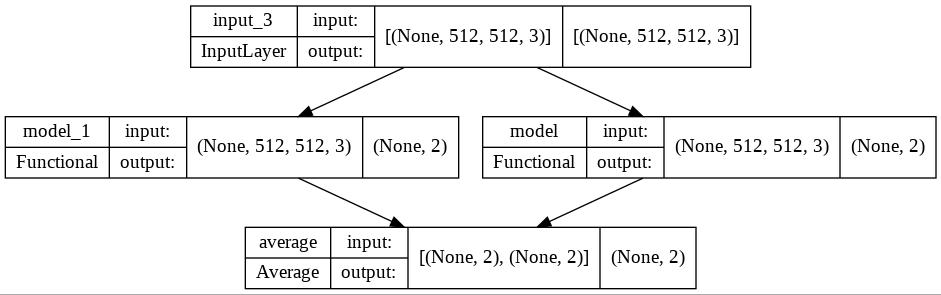

In [ ]:
tf.keras.utils.plot_model(ensemble_model, 'model.jpg', show_shapes= True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
filepath="skin cancer_detection_ensemble2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=5)
callbacks_list = [checkpoint]

**Training**

In [34]:
skin_hist = ensemble_model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 50,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 14.3932 - accuracy: 0.5278  
Epoch 1: val_loss improved from inf to 13.69397, saving model to skin cancer_detection_ensemble2.hdf5
2/2 [==============================] - 214s 48s/step - loss: 14.3932 - accuracy: 0.5278 - val_loss: 13.6940 - val_accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 13.1740 - accuracy: 0.7222  
Epoch 2: val_loss improved from 13.69397 to 12.14937, saving model to skin cancer_detection_ensemble2.hdf5
2/2 [==============================] - 200s 47s/step - loss: 13.1740 - accuracy: 0.7222 - val_loss: 12.1494 - val_accuracy: 0.7500
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 12.2389 - accuracy: 0.8611  
Epoch 3: val_loss improved from 12.14937 to 11.22631, saving model to skin cancer_detection_ensemble2.hdf5
2/2 [==============================] - 197s 47s/step - loss: 12.2389 - accuracy: 0.8611 - val_loss: 11.2263 - val_accuracy: 1.0000
Epoch 

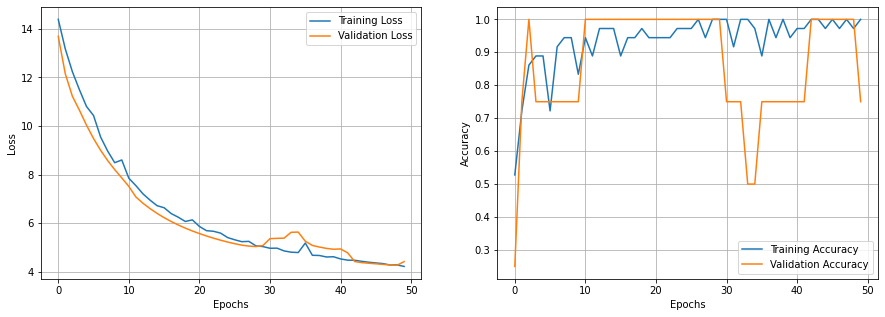

In [35]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( skin_hist.history["loss"], label = "Training Loss")
plt.plot( skin_hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( skin_hist.history["accuracy"], label = "Training Accuracy")
plt.plot( skin_hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [38]:
test_images = "/content/drive/MyDrive/skin cancer/data/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'benign':0,
    'malignant':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)

['malignant', 'benign']
(40, 512, 512, 3) (40, 2)


In [39]:
ensemble_model.evaluate(x_test,y_test)

2/2 [==============================] - 178s 34s/step - loss: 5.3985 - accuracy: 0.8000


[5.398515224456787, 0.800000011920929]

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
predictions = ensemble_model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [42]:
print(confusion_matrix(test_labels, pred))

[[17  3]
 [ 5 15]]


Normalized Confusion Matrix: 
[[0.85 0.15]
 [0.25 0.75]]


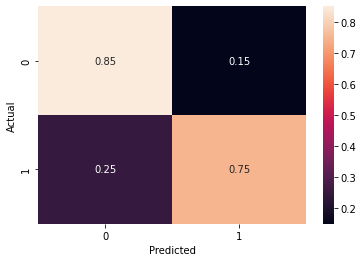

In [44]:
# Normalized Confusion Matrix
import numpy as np
import seaborn as sns
print("Normalized Confusion Matrix: ")
cm_normalized = np.round(confusion_matrix(test_labels, pred)/np.sum(confusion_matrix(test_labels, pred), axis = 1).reshape(-1, 1),2)
print(cm_normalized)
sns.heatmap(cm_normalized, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
sensitivity1 = confusion_matrix(test_labels, pred)[0,0]/(confusion_matrix(test_labels, pred)[0,0]+confusion_matrix(test_labels, pred)[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.85


In [46]:
specificity1 = confusion_matrix(test_labels, pred)[1,1]/(confusion_matrix(test_labels, pred)[1,0]+confusion_matrix(test_labels, pred)[1,1])
print('Specificity : ', specificity1)

Specificity :  0.75
